               close      high       low      open   s     volume
date                                                             
2020-08-03  108.7414  111.4414  107.6964  108.0039  ok  308151200
2020-08-04  109.4676  110.5926  108.1901  108.9351  ok  173071600
2020-08-05  109.8644  110.1944  108.6994  109.1794  ok  121992000
2020-08-06  113.6975  114.2075  109.5925  110.2000  ok  202428800
2020-08-07  111.1125  113.6750  110.2925  113.2050  ok  198045600


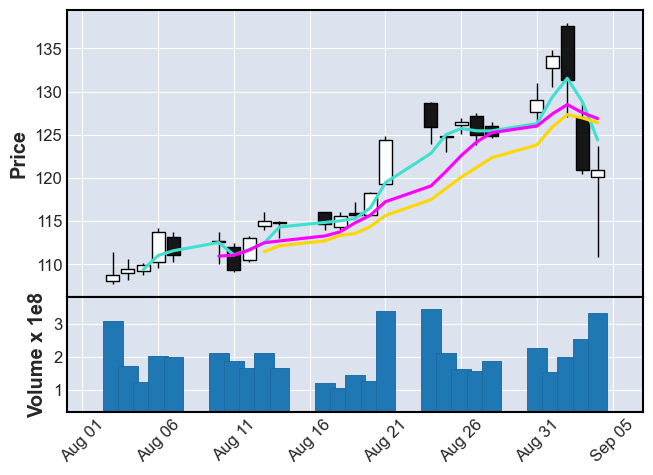

In [1]:
import pandas as pd 
import os
import json
import requests as req 
import datetime
import math
from matplotlib import pyplot as plt
import matplotlib.ticker as mpticker
import mplfinance as mpf

#read in the finnhub.io token
with open('local_settings.txt') as f:
    json_local = json.load(f)

finn_token = json_local["finn_token"]

#Set variables for the dataset
end_time = math.floor(datetime.datetime.utcnow().timestamp())
start_time = math.floor(end_time - datetime.timedelta(weeks=52).total_seconds())

# #testing on Apple Stock 
ticker = "AAPL"
# finn_url = f"https://finnhub.io/api/v1/stock/candle?symbol={ticker}&resolution=D&from={start_time}&to={end_time}&token={finn_token}"
# print(finn_url)
# r = req.get(finn_url)
# data = r.json()

# df = pd.read_json(finn_url, orient='records')
# df['t'] = df['t'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).date())
# df.rename(columns={"c": "close", "h": "high", "l":"low", "o":"open", "v":"volume", "t":"date"}, inplace=True)
# #df.set_index('date', inplace=True)
# df.set_index('date', inplace=True)
# df.index = pd.to_datetime(df.index)
# print(df)
# df.to_pickle("aapl.p")

daily = pd.read_pickle('aapl.p')
daily = daily.loc['2020-08-01':]

print(daily.head())

mpf.plot(daily,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)


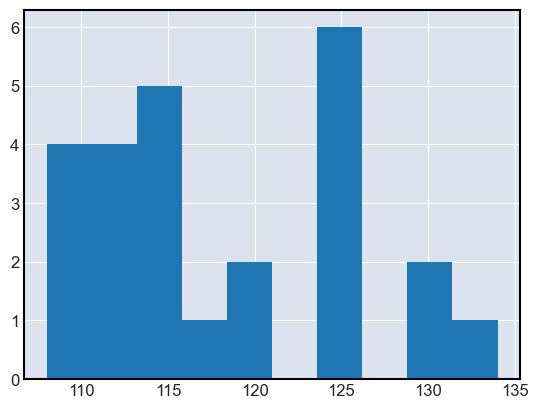

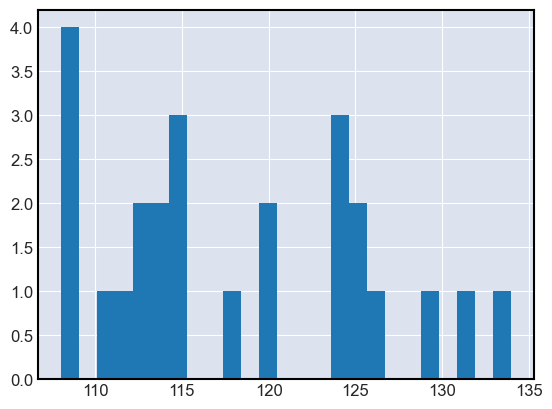

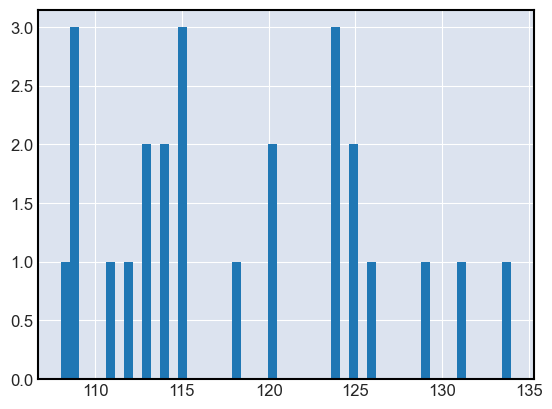

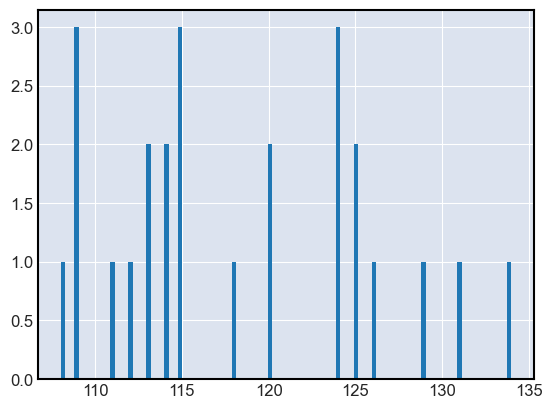

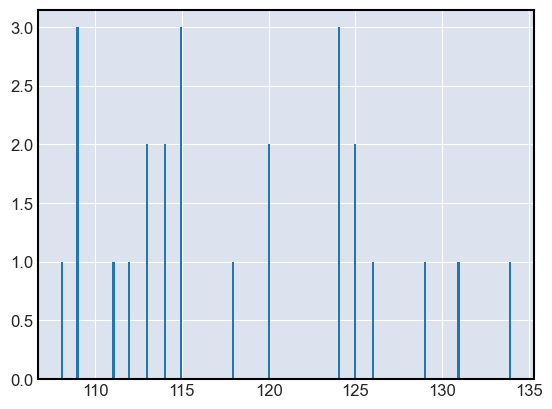

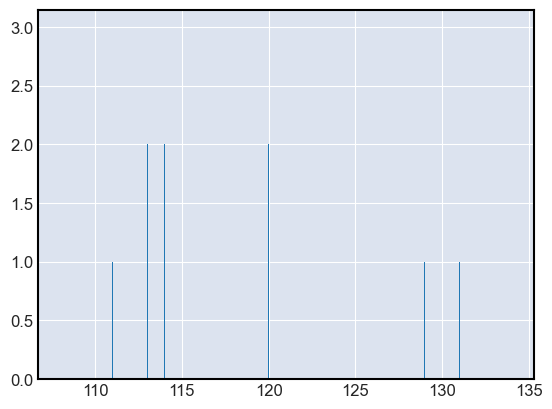

In [3]:
smoothed_closes = list([math.floor(x) for x in daily['close']])
#print(smoothed_closes)

bins = [10,25,50,100, 200, 1000]
for bin in bins:
    plt.hist(smoothed_closes, bins=bin)
    plt.show()